### ECG Artifact Handling with MNE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fastparquet, pyarrow
import mne
from mne.decoding import Scaler
from mne_features.univariate import compute_pow_freq_bands
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
from utils import *

In [2]:
mne.set_log_level('WARNING')

In [3]:
df = pd.read_csv('by_patient.csv')

other_df = activity_df(df, 'Other', 'expert_consensus')
seizure_df = activity_df(df, 'Seizure', 'expert_consensus')
lpd_df = activity_df(df, 'LPD', 'expert_consensus')
gpd_df = activity_df(df, 'GPD', 'expert_consensus')
lrda_df = activity_df(df, 'LRDA', 'expert_consensus')
grda_df = activity_df(df, 'GRDA', 'expert_consensus')

In [4]:
i_vals = [i for i in range(df.shape[0])]
random_index = np.random.choice(i_vals, size = 10, replace = False)

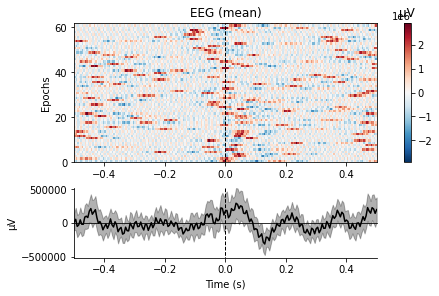

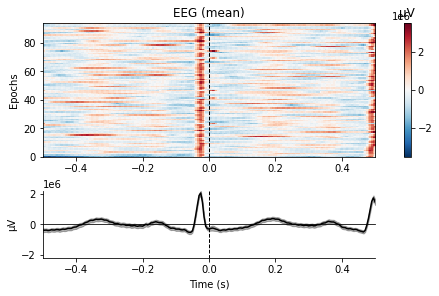

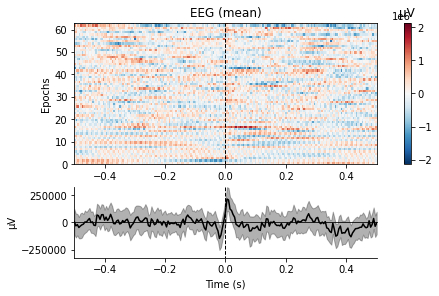

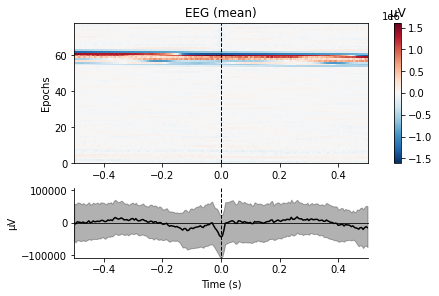

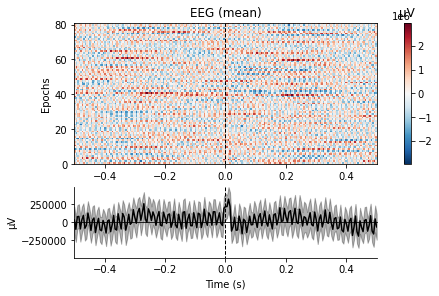

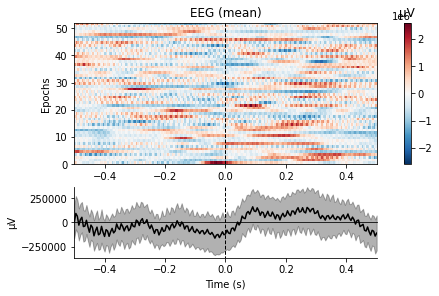

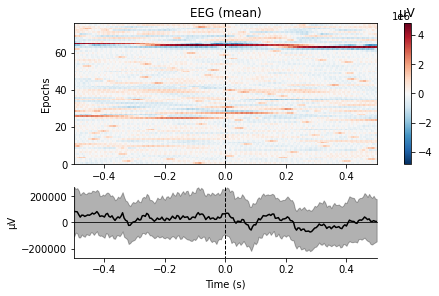

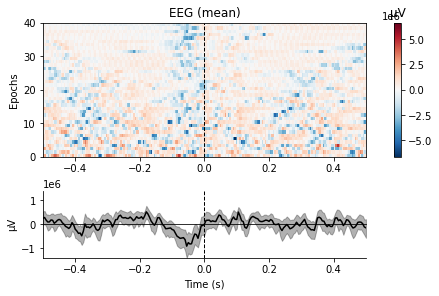

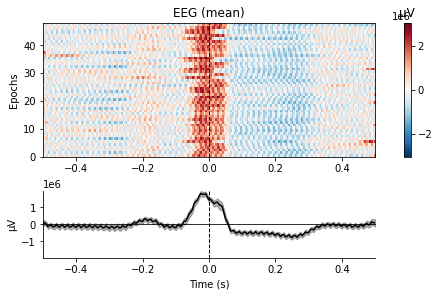

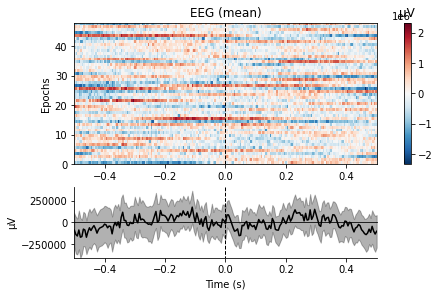

In [6]:
for i in random_index:
    raw = load_preprocess(df, i, 0.5, None, bandpass = True, reref = False)
    ecg_epochs = mne.preprocessing.create_ecg_epochs(raw)
    ecg_epochs.plot_image(combine="mean")
    plt.show()

In [7]:
avg_ecg_epochs = ecg_epochs.average().apply_baseline((-0.5, -0.2))

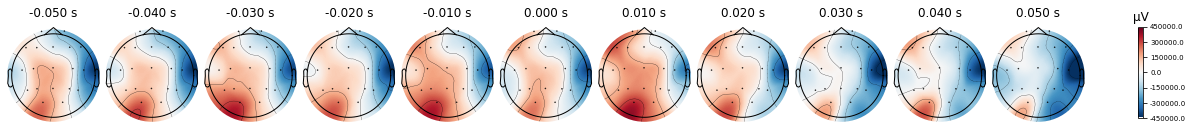

In [8]:
avg_ecg_epochs.plot_topomap(times=np.linspace(-0.05, 0.05, 11))
plt.show()

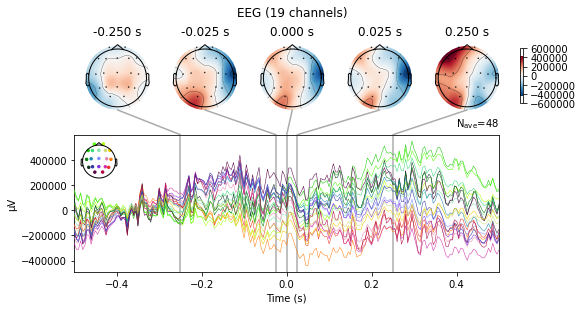

In [9]:
avg_ecg_epochs.plot_joint(times=[-0.25, -0.025, 0, 0.025, 0.25])
plt.show()

In [78]:
rnd_index = np.random.choice(i_vals, size = 1)[0]

In [79]:
raw = load_preprocess(df, rnd_index, 1, None, bandpass = True, reref = False)

In [80]:
raw.filter(l_freq = 0.1, h_freq = None, picks = 'ecg')

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,22 points
Good channels,"19 EEG, 1 ECG"
Bad channels,None
EOG channels,Not available
ECG channels,EKG
Sampling frequency,200.00 Hz
Highpass,1.00 Hz
Lowpass,100.00 Hz


In [81]:
from mne.preprocessing import ICA

In [82]:
ica = ICA(n_components = 19)
ica.fit(raw, picks = 'eeg')

/home/clay/.local/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,1000 iterations on raw data (10000 samples)
ICA components,19
Available PCA components,19
Channel types,eeg
ICA components marked for exclusion,—


In [83]:
ecg_indices, ecg_scores = ica.find_bads_ecg(raw)

In [84]:
ecg_indices

[]

In [37]:
ica.exclude = ecg_indices

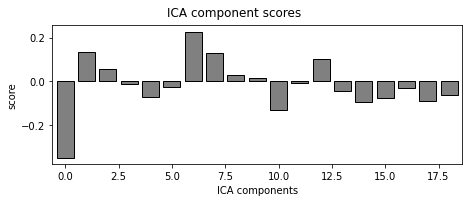

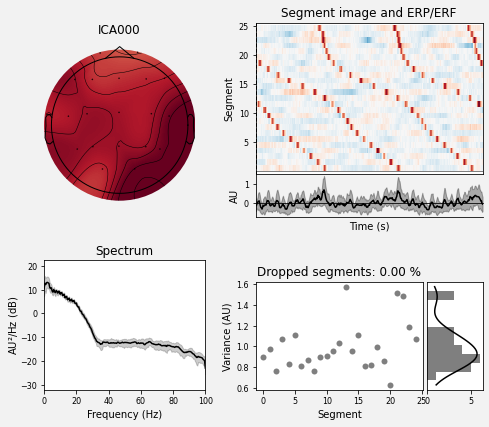

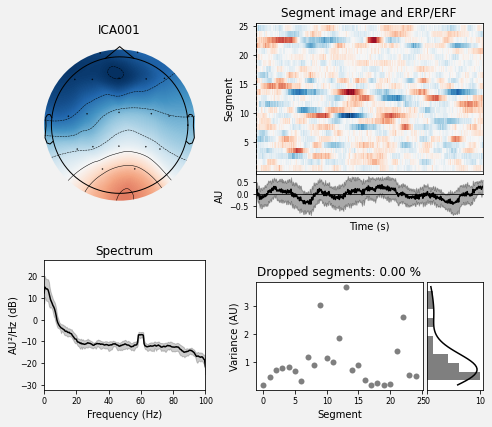

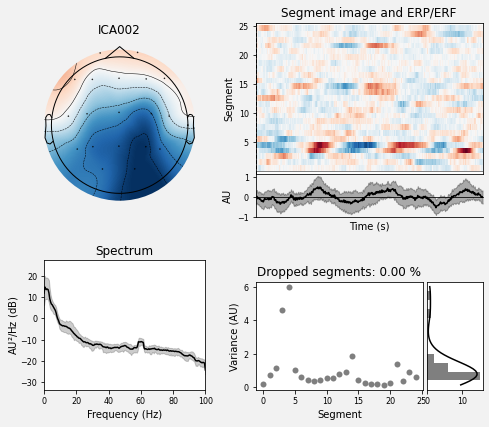

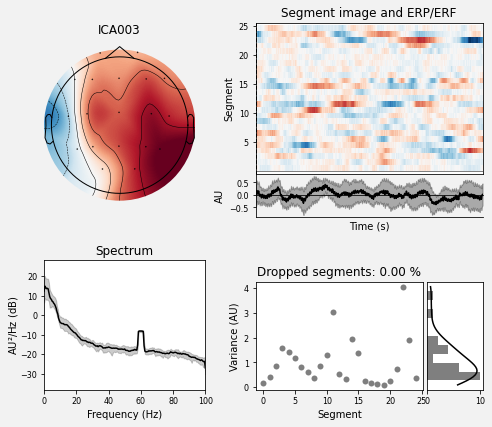

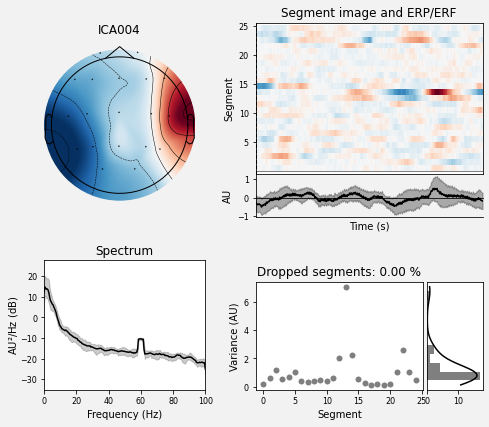

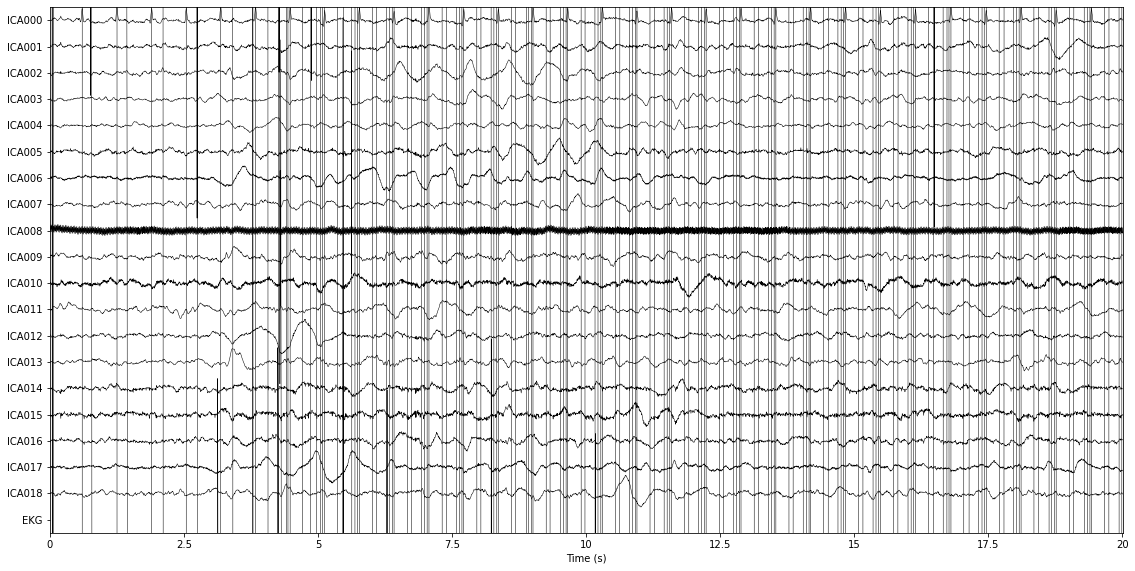

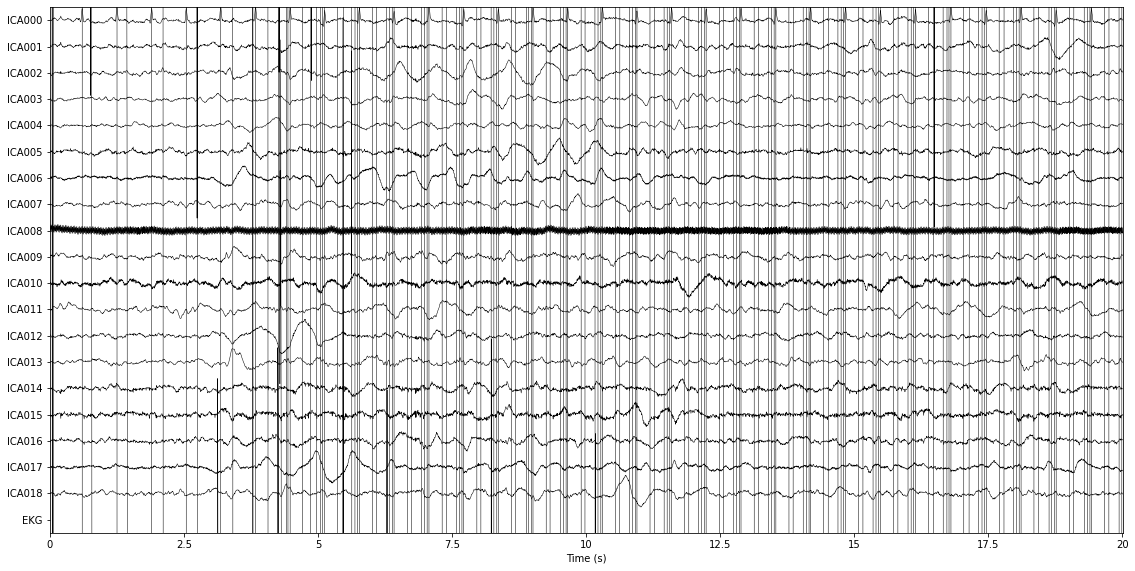

In [39]:
ica.plot_scores(ecg_scores)

ica.plot_properties(raw, picks = ecg_indices)

ica.plot_sources(raw, show_scrollbars=False)